# SVM vs Logistic Regression

## Objective

Compare Support Vector Machines and Logistic Regression
from theoretical and practical perspectives.

We analyze:

- Decision boundaries
- Loss functions
- Regularization
- Robustness to noise
- Performance on different dataset sizes
- Computational complexity


## Mathematical Formulation

### Logistic Regression

Minimizes:

Σ log(1 + exp(-yᵢ (wᵀxᵢ + b))) + λ ||w||²

- Uses logistic loss
- Produces probabilistic outputs

---

### Support Vector Machine

Minimizes:

(1/2)||w||² + C Σ max(0, 1 - yᵢ(wᵀxᵢ + b))

- Uses hinge loss
- Maximizes margin
- Only support vectors influence solution


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    class_sep=1.5,
    random_state=42
)


In [4]:
def plot_boundary(model, X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 300),
        np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 300)
    )

    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_grid)
    y_pred = y_pred.reshape(x0.shape)

    ax.contourf(x0, x1, y_pred, alpha=0.2, cmap="bwr")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
    return ax


In [5]:
log_reg = LogisticRegression()
svm = SVC(kernel="linear")

log_reg.fit(X, y)
svm.fit(X, y)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


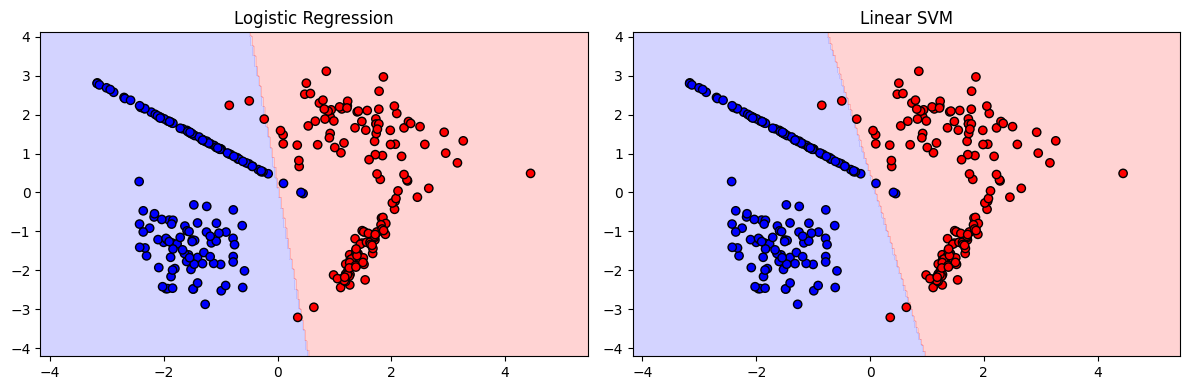

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

plot_boundary(log_reg, X, y, axes[0])
axes[0].set_title("Logistic Regression")

plot_boundary(svm, X, y, axes[1])
axes[1].set_title("Linear SVM")

plt.tight_layout()
plt.show()


## Loss Function Comparison

Logistic Loss: Smooth, probabilistic  
Hinge Loss: Margin-based, piecewise linear


In [7]:
X_noisy, y_noisy = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    class_sep=0.7,
    flip_y=0.15,
    random_state=42
)

log_reg.fit(X_noisy, y_noisy)
svm.fit(X_noisy, y_noisy)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [8]:
X_large, y_large = make_classification(
    n_samples=10000,
    n_features=20,
    random_state=42
)

%timeit LogisticRegression(max_iter=1000).fit(X_large, y_large)
%timeit SVC(kernel="linear").fit(X_large, y_large)


6.21 ms ± 529 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.78 s ± 32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Pros & Cons

| Logistic Regression | SVM |
|---------------------|-----|
| Probabilistic output | Maximizes margin |
| Scales well | Robust to high-dimensional data |
| Smooth optimization | Only support vectors matter |
| Sensitive to outliers | Kernel trick enables nonlinear classification |
| Easier to interpret | Slower on very large datasets |


## When to Use Which?

Use Logistic Regression when:
- Dataset is large
- Probabilities are required
- Interpretability matters

Use SVM when:
- Dataset is moderate in size
- Margin maximization is important
- High-dimensional feature space
- Nonlinear boundary required (kernel)
